date_Nov 30th, 2016  
author_Claireh(xh895)

In [25]:
# import needed packages
from geopandas import GeoDataFrame
from pyproj import Proj, transform
import fiona
from fiona.crs import from_epsg
import numpy as np
import os
import matplotlib.pyplot as plt
import shapely
%pylab inline

PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [26]:
# load shapefile
shape_path= PUIdata + "/HW11_data/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)

In [27]:
# extract Brooklyn shape polygons
ct_shape = ct_shape[ct_shape['BoroName'] == 'Brooklyn']

# convert coordinate system to lat/lon
ct_latlon=ct_shape.to_crs(epsg=4326)

In [28]:
# coordinates for 1 Metrotech, Brooklyn, NY is 
#"lat" : 40.6932169,
#"lng" : -73.986403
point = shapely.geometry.Point((-73.986403,40.6932169))

In [29]:
# loop over the shapefile to find which polygon contains CUSP coordinates
contains = []
for i in ct_latlon.index:
    polygon = shapely.geometry.asShape(ct_latlon.geometry[i])
    result = polygon.contains(point)
    if result == True:
        print 'CUSP is contained in', polygon.wkt
        contains.append(i)
    else:
        continue
        
# CUSP is contained in one polygon

CUSP is contained in POLYGON ((-73.98619262163142 40.69375351897136, -73.98621117787486 40.6933838601358, -73.98622595691906 40.69308831343839, -73.98725396415627 40.69312490276504, -73.98722751058244 40.69379951953569, -73.98619262163142 40.69375351897136))


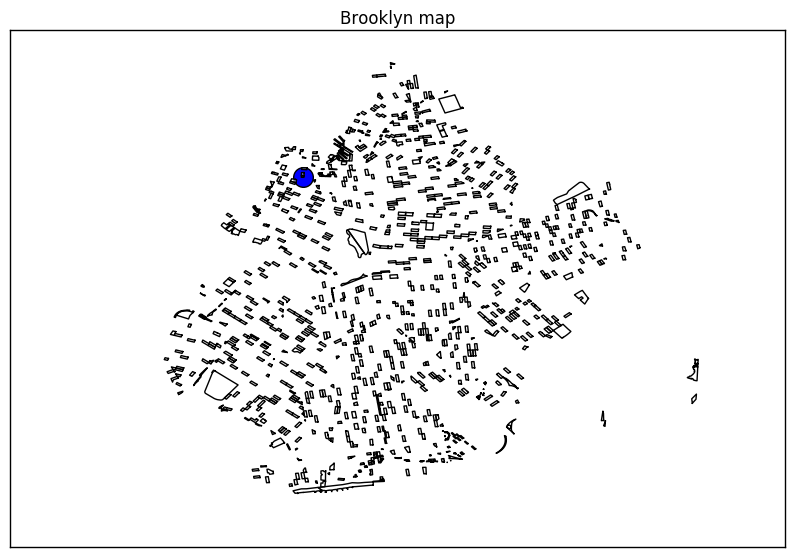

In [30]:
# plot the results
# plot one every 10 polygons of Brooklyn
ax = ct_latlon[::10].plot(figsize = (10,10), color = 'w')
# plot the polygon contains CUSP
ct_latlon[ct_latlon.index == contains[0]].plot(ax = ax, c = 'r')
# plot CUSP location
plt.scatter(point.bounds[0], point.bounds[1], s = 200)

plt.xticks([])
plt.yticks([])
plt.title('Brooklyn map')